# NBA Hall of Fame Workbook

In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

## Data Import

In [511]:
nba = pd.read_csv("data/Seasons_Stats.csv", index_col = 0)

In [512]:
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [513]:
nba.shape

(24691, 52)

In [514]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24691 entries, 0 to 24690
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    24624 non-null  float64
 1   Player  24624 non-null  object 
 2   Pos     24624 non-null  object 
 3   Age     24616 non-null  float64
 4   Tm      24624 non-null  object 
 5   G       24624 non-null  float64
 6   GS      18233 non-null  float64
 7   MP      24138 non-null  float64
 8   PER     24101 non-null  float64
 9   TS%     24538 non-null  float64
 10  3PAr    18839 non-null  float64
 11  FTr     24525 non-null  float64
 12  ORB%    20792 non-null  float64
 13  DRB%    20792 non-null  float64
 14  TRB%    21571 non-null  float64
 15  AST%    22555 non-null  float64
 16  STL%    20792 non-null  float64
 17  BLK%    20792 non-null  float64
 18  TOV%    19582 non-null  float64
 19  USG%    19640 non-null  float64
 20  blanl   0 non-null      float64
 21  OWS     24585 non-null  float64
 22

In [515]:
nba.isnull().sum()

Year         67
Player       67
Pos          67
Age          75
Tm           67
G            67
GS         6458
MP          553
PER         590
TS%         153
3PAr       5852
FTr         166
ORB%       3899
DRB%       3899
TRB%       3120
AST%       2136
STL%       3899
BLK%       3899
TOV%       5109
USG%       5051
blanl     24691
OWS         106
DWS         106
WS          106
WS/48       590
blank2    24691
OBPM       3894
DBPM       3894
BPM        3894
VORP       3894
FG           67
FGA          67
FG%         166
3P         5764
3PA        5764
3P%        9275
2P           67
2PA          67
2P%         195
eFG%        166
FT           67
FTA          67
FT%         925
ORB        3894
DRB        3894
TRB         379
AST          67
STL        3894
BLK        3894
TOV        5046
PF           67
PTS          67
dtype: int64

## Data Cleaning

### Cleaning the NBA Dataframe

In [516]:
nba['Year'] = np.where((nba['Year'].isna()), 1950, nba['Year'])
nba['Age'] = np.where((nba['Age'].isna()), nba['Age'].mean(), nba['Age'])

In [517]:
integer_types = ['Year', 'Age']

nba[integer_types] = nba[integer_types].astype(int)
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950,Ed Bartels,F,24,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


### Generating Hall of Fame Categorical Target Variable

In [518]:
nba['HOF'] = [1 if x == True else 0 for x in nba['Player'].str.endswith('*')]

### Reading in Separate Dataframe to Capture NBA Champions

In [519]:
champs = pd.read_csv("data/champions.csv")

In [520]:
champs.head()

,Year,League,Champion,Tm,Runner_Up,Runner_Up_Code
0,2020,NBA,Los Angeles Lakers,LAL,Miami Heat,LAL
1,2019,NBA,Toronto Raptors,TOR,Golden State Warriors,TOR
2,2018,NBA,Golden State Warriors,GSW,Cleveland Cavaliers,GSW
3,2017,NBA,Golden State Warriors,GSW,Cleveland Cavaliers,GSW
4,2016,NBA,Cleveland Cavaliers,CLE,Golden State Warriors,CLE


### Reading in Separate Dataframe to Capture NBA All-Stars

In [521]:
all_stars = pd.read_csv("data/all_stars.csv", encoding='latin-1')
all_stars.head()

,Player,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 25,MP.1,PTS.1,TRB.1,AST.1
0,Kareem Abdul-Jabbar,18,13.0,449.0,105,213,0.493,0.0,1.0,0.000,105,212,0.495,41,50,0.820,33.0,84.0,149,51,6.0,31.0,28.0,57,251,NaN,24.9,13.9,8.3,2.8
1,LeBron James,17,17.0,473.0,161,310,0.519,38.0,119.0,0.319,123,191,0.644,29,40,0.725,13.0,90.0,103,98,19.0,7.0,55.0,18,389,NaN,27.8,22.9,6.1,5.8
2,Kobe Bryant,15,15.0,415.0,119,238,0.500,22.0,68.0,0.324,97,170,0.571,30,38,0.789,28.0,47.0,75,70,38.0,6.0,35.0,35,290,NaN,27.7,19.3,5.0,4.7
3,Tim Duncan,15,12.0,311.0,63,115,0.548,1.0,4.0,0.250,62,111,0.559,13,17,0.765,38.0,98.0,136,31,13.0,8.0,31.0,16,140,NaN,20.7,9.3,9.1,2.1
4,Kevin Garnett,14,11.0,287.0,72,141,0.511,0.0,4.0,0.000,72,137,0.526,14,16,0.875,25.0,63.0,88,40,16.0,11.0,20.0,10,158,NaN,20.5,11.3,6.3,2.9


In [522]:
all_stars_new = all_stars[['Player', 'G']]

### Reading in Player Data for Supplementary Statistics

In [523]:
player_data = pd.read_csv("data/player_data.csv")
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [524]:
player_data.shape

(4550, 8)

In [525]:
player_data['seasons'] = player_data['year_end'] - player_data['year_start']
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,seasons
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University,5


### Removing Total Index Values

In [526]:
nba = nba[nba.Tm != 'TOT']

### Adding Indexes for Comparing Datasets

In [527]:
# nba["id"] = nba.index + 1 # Drop this column later
# champs["id"] = champs.index + 1

#### Adding Categorical Variables for Championship Teams & All Star Appearances

In [528]:
nba['concat'] = nba['Year'].astype(str) + nba['Tm']
champs['concat'] = champs['Year'].astype(str) + champs['Tm']
champs['runner_up'] = champs['Year'].astype(str) + champs['Runner_Up_Code']


nba['champ'] = nba['concat'].isin(champs['concat']).astype(int)
nba['runner_up'] = nba['concat'].isin(champs['runner_up']).astype(int)

nba['Player'] = nba['Player'].str.replace('*', '')
nba['all_star'] = nba['Player'].isin(all_stars['Player']).astype(int)
nba.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,HOF,concat,champ,runner_up,all_star
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,0,1950FTW,0,0,0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,0,1950INO,0,0,0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,0,1950CHS,0,0,1
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,0,1950DNN,0,0,0
5,1950,Ed Bartels,F,24,NYK,2.0,NaN,NaN,NaN,0.376,NaN,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.250,NaN,NaN,NaN,1.0,4.0,0.250,0.250,2.0,3.0,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0,0,1950NYK,0,0,0


### Group Dataframe by Player Name

In [529]:
nba_total = nba.groupby('Player', dropna = False)[['PTS', 'AST', 'TOV', 'ORB', 'DRB','TRB', 'BLK', 'STL', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF', 'champ', 'runner_up']].sum().reset_index()
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0


In [530]:
nba_total.shape

(3919, 22)

#### Bringing in All Star Totals for players

In [531]:
nba_total = pd.merge(nba_total, all_stars_new, on = 'Player', how = 'left')
nba_total.rename(columns = {'G_y':'all_star_app'}, inplace = True)

### Creating In-Game Statistics

In [532]:
nba_total['PPG'] = nba_total.PTS/nba_total.G_x
nba_total['APG'] = nba_total.AST/nba_total.G_x
nba_total['RPG'] = nba_total.TRB/nba_total.G_x
nba_total['BPG'] = nba_total.BLK/nba_total.G_x
nba_total['SPG'] = nba_total.STL/nba_total.G_x
nba_total['TPG'] = nba_total.TOV/nba_total.G_x
nba_total['3PG'] = nba_total['3P']/nba_total.G_x
nba_total['FG%'] = nba_total.FG/nba_total.FGA
nba_total['3P%'] = nba_total['3P']/nba_total['3PA']
nba_total['FT%'] = nba_total.FT/nba_total.FTA

In [533]:
# Take advanced statistics out of dataframe so that they aren't affected by seasonal totals
advanced_stats = nba.groupby('Player', dropna = False)['USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'TS%', 'PER', 'eFG%'].mean()

In [534]:
nba_total = pd.merge(nba_total, advanced_stats, on = 'Player', how = 'left')
nba_total.rename(columns = {'G_x':'Games'}, inplace = True)

In [535]:
# Fixing HOF totals
nba_total['HOF'] = np.where((nba_total['HOF'] > 1), 1, 0)

# Dealing with NaN values in all-star appearances
nba_total['all_star_app'].fillna(0, inplace = True)

In [536]:
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,1.0,9.648670,1.095462,7.412363,0.427230,0.808294,1.122066,0.097027,0.493806,0.253579,0.733882,14.558824,3.429412,2.417647,5.847059,0.123824,0.544765,13.958824,0.493647
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,0.0,1.000000,0.000000,2.750000,0.000000,0.125000,0.375000,0.000000,0.190476,NaN,NaN,17.100000,-0.200000,0.100000,-0.200000,-0.129000,0.190000,-0.400000,0.190000
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,0.0,9.947020,2.119205,2.086093,0.158940,0.377483,1.344371,0.059603,0.435120,0.138462,0.777778,23.700000,-0.200000,0.700000,0.550000,0.016500,0.480000,11.550000,0.438500
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,0.0,5.525000,1.837500,1.000000,0.150000,0.250000,0.775000,0.912500,0.377273,0.378238,0.822222,20.766667,0.100000,-0.033333,0.100000,-0.141333,0.324000,4.366667,0.310667
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,0.0,2.181818,0.181818,1.636364,0.590909,0.045455,0.454545,0.227273,0.404762,0.500000,0.450000,17.600000,-0.200000,0.200000,0.000000,-0.001000,0.472000,8.400000,0.464000


## Feature Engineering

In [561]:
# Variable for finals appearances
nba_total['finals_app'] = nba_total['champ'] + nba_total['runner_up']



# Variable for years in the league
# nba_total['years_played'] = player_data['year_end'] - player_data['year_start']

# Variable for teams played for
# nba_total['teams_played'] = nba['Tm'].count().unique()

# Column for primary position played

In [562]:
nba_total.head()

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%,finals_app
0,A.C. Green,12331.0,1400.0,1434.0,3354.0,6119.0,9473.0,546.0,1033.0,1278.0,832.0,36552.0,4544.0,9202.0,124.0,489.0,3119.0,4250.0,2436.0,0,3,2,1.0,9.648670,1.095462,7.412363,0.427230,0.808294,1.122066,0.097027,0.493806,0.253579,0.733882,14.558824,3.429412,2.417647,5.847059,0.123824,0.544765,13.958824,0.493647,5
1,A.J. Bramlett,8.0,0.0,3.0,12.0,10.0,22.0,0.0,1.0,8.0,0.0,61.0,4.0,21.0,0.0,0.0,0.0,0.0,13.0,0,0,0,0.0,1.000000,0.000000,2.750000,0.000000,0.125000,0.375000,0.000000,0.190476,NaN,NaN,17.100000,-0.200000,0.100000,-0.200000,-0.129000,0.190000,-0.400000,0.190000,0
2,A.J. English,1502.0,320.0,203.0,140.0,175.0,315.0,24.0,57.0,151.0,18.0,3108.0,617.0,1418.0,9.0,65.0,259.0,333.0,287.0,0,0,0,0.0,9.947020,2.119205,2.086093,0.158940,0.377483,1.344371,0.059603,0.435120,0.138462,0.777778,23.700000,-0.200000,0.700000,0.550000,0.016500,0.480000,11.550000,0.438500,0
3,A.J. Guyton,442.0,147.0,62.0,22.0,58.0,80.0,12.0,20.0,80.0,14.0,1246.0,166.0,440.0,73.0,193.0,37.0,45.0,58.0,0,0,0,0.0,5.525000,1.837500,1.000000,0.150000,0.250000,0.775000,0.912500,0.377273,0.378238,0.822222,20.766667,0.100000,-0.033333,0.100000,-0.141333,0.324000,4.366667,0.310667,0
4,A.J. Hammons,48.0,4.0,10.0,8.0,28.0,36.0,13.0,1.0,22.0,0.0,163.0,17.0,42.0,5.0,10.0,9.0,20.0,21.0,0,0,0,0.0,2.181818,0.181818,1.636364,0.590909,0.045455,0.454545,0.227273,0.404762,0.500000,0.450000,17.600000,-0.200000,0.200000,0.000000,-0.001000,0.472000,8.400000,0.464000,0


## EDA

#### Pair Plot

In [494]:
# stats = ['HOF', 'BLK', 'STL', 'PPG', 'APG', 'RPG', 'USG%', 'OWS', 'DWS', 'WS', 'TS%', 'PER', 'eFG%', 'champ', 'runner_up', 'all_star_app']

# pair_plt_stats = nba_total[stats]

# sns.pairplot(pair_plt_stats, hue = 'HOF')

# # plt.savefig('nba_pair_plt.png')
# plt.show();

#### Correlation Matrix

In [495]:
# nba_corr = nba_total.corr()
# plt.subplots(figsize=(20,15))

# corr = nba_corr
# c1 = corr.abs().unstack()
# c1.sort_values(ascending = False)

# sns.heatmap(corr, 
#     annot=True, 
#     annot_kws={"fontsize":8},
#     xticklabels = nba_corr.columns.values, # x labels
#     yticklabels = nba_corr.columns.values, # y labels
#     vmin = -1, # color scale the min value
#     vmax = 1, # color scale the max
#     center = 0, # color scale place at the center at 0
#     cmap = "YlGnBu", # color palette
#     square = True) # each cell will be square-shaped
# plt.show();

In [537]:
nba_total['HOF'].value_counts()

0    3794
1     125
Name: HOF, dtype: int64

#### Stat Correlation Bar Chart with HOF Players

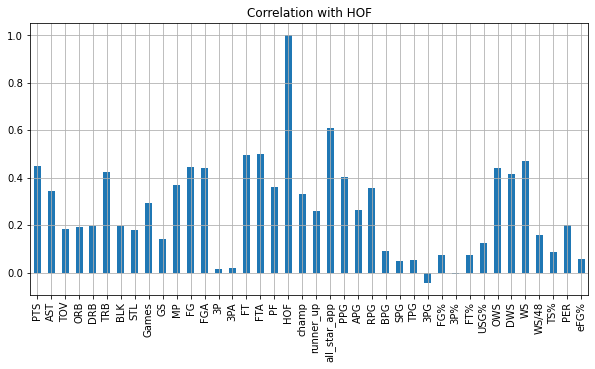

In [555]:
nba_total.corrwith(nba_total.HOF).plot.bar(figsize = (10, 5), title = "Correlation with HOF", 
                                        fontsize = 10,rot = 90, grid = True);

#### PPG by HOF's

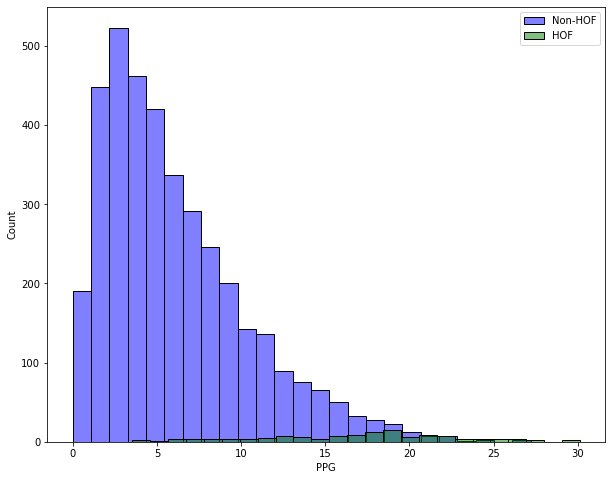

In [538]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(nba_total[nba_total['HOF'] == 0].PPG, bins = 25, label = 'Non-HOF', alpha = .50, edgecolor = 'black', color = 'blue')
sns.histplot(nba_total[nba_total['HOF'] == 1].PPG, bins = 25, label = 'HOF', alpha = .50, edgecolor = 'black', color = 'green')
plt.legend(loc = 'upper right')

#### Games Played by HOF's

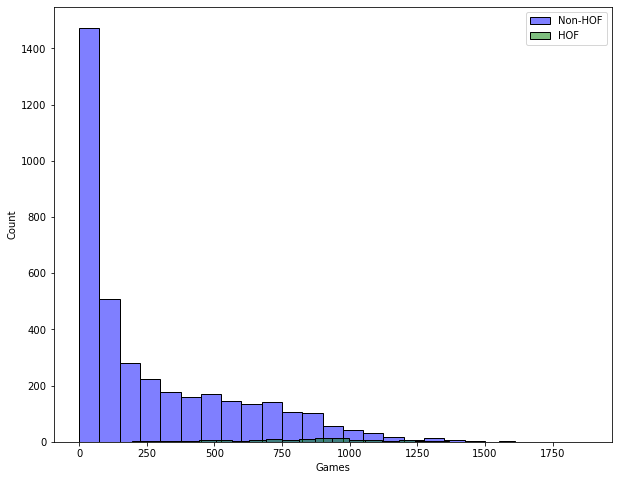

In [539]:
fig, ax = plt.subplots(figsize = (10,8))
sns.histplot(nba_total[nba_total['HOF'] == 0].Games, bins = 25, label = 'Non-HOF', alpha = .50, edgecolor = 'black', color = 'blue')
sns.histplot(nba_total[nba_total['HOF'] == 1].Games, bins = 25, label = 'HOF', alpha = .50, edgecolor = 'black', color = 'green')
plt.legend(loc = 'upper right')

''

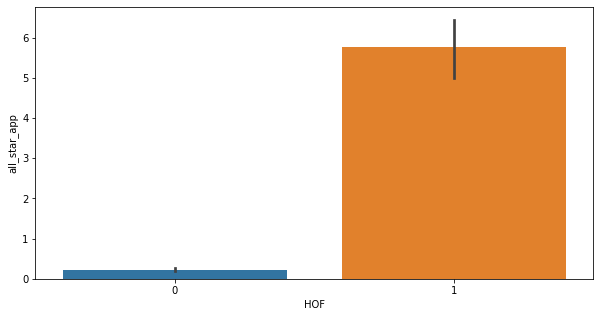

In [544]:
x_line = nba_total['HOF']
y_line = nba_total['all_star_app']

plt.figure(figsize=(10, 5))
sns.barplot(data = nba_total, x = x_line, y = y_line)
;

#### All-Star Appearances by HOF's

<AxesSubplot:xlabel='HOF', ylabel='all_star_app'>

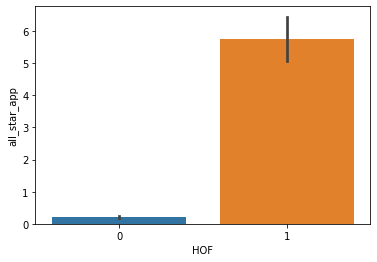

In [541]:
sns.barplot(x = nba_total.HOF, y = nba_total.all_star_app)

#### Points Scored vs PER

<AxesSubplot:xlabel='PTS', ylabel='OWS'>

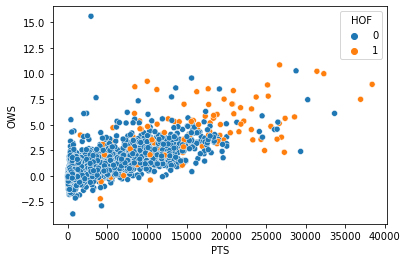

In [548]:
sns.scatterplot(x = nba_total.PTS, y = nba_total.OWS, hue = nba_total['HOF'])

#### PER for HOF's

''

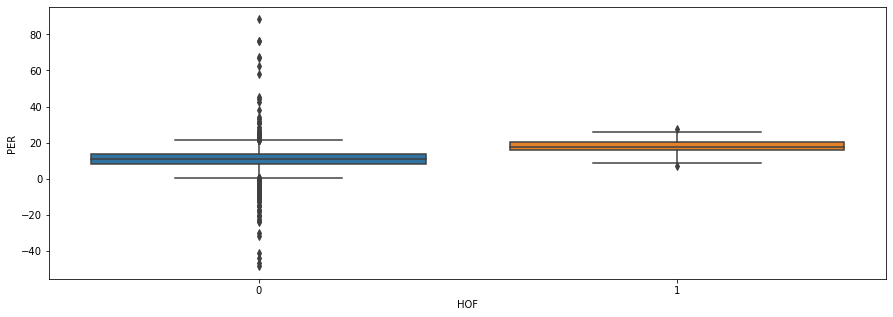

In [575]:
x_line = nba_total['HOF']
y_line = nba_total['PER']

plt.figure(figsize=(15, 5))
sns.barplot(data = nba_total, x = x_line, y = y_line)
;

#### Average Win Share for HOF's

<AxesSubplot:xlabel='HOF', ylabel='WS'>

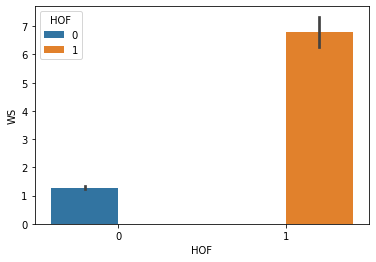

In [552]:
sns.barplot(x = nba_total.HOF, y = nba_total.WS, hue = nba_total.HOF)

#### Finals Appearances of HOF's

<AxesSubplot:xlabel='finals_app', ylabel='champ'>

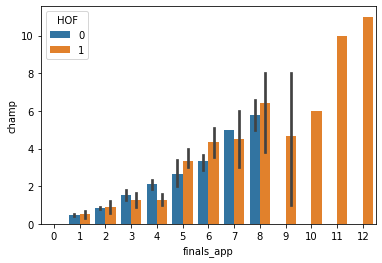

In [564]:
sns.barplot(x = nba_total.finals_app, y = nba_total.champ, hue = nba_total.HOF)

#### Games Played vs HOF

<AxesSubplot:xlabel='HOF', ylabel='Games'>

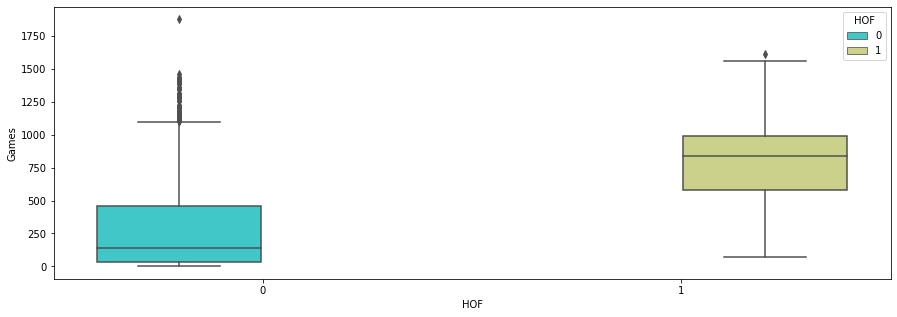

In [577]:
plt.figure(figsize=(15,5))
sns.boxplot(data = nba_total, x = 'HOF', y = 'Games', hue = 'HOF', palette = "rainbow")

In [581]:
nba_total.sort_values(by = 'AST', ascending = False)

,Player,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,Games,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up,all_star_app,PPG,APG,RPG,BPG,SPG,TPG,3PG,FG%,3P%,FT%,USG%,OWS,DWS,WS,WS/48,TS%,PER,eFG%,finals_app
2070,John Stockton,19711.0,15806.0,4244.0,966.0,3085.0,4051.0,315.0,3265.0,1504.0,1300.0,47764.0,7039.0,13658.0,845.0,2203.0,4788.0,5796.0,3942.0,1,0,2,10.0,13.105718,10.509309,2.693484,0.209441,2.170878,2.821809,0.561835,0.515376,0.383568,0.826087,18.678947,7.510526,3.421053,10.926316,0.204158,0.604105,21.468421,0.541421,2
1776,Jason Kidd,17529.0,12091.0,4003.0,1768.0,6957.0,8725.0,450.0,2684.0,1391.0,1350.0,50111.0,6219.0,15557.0,1988.0,5701.0,3103.0,3954.0,2572.0,0,1,3,9.0,12.601725,8.692308,6.272466,0.323508,1.929547,2.877786,1.429188,0.399756,0.348711,0.784775,18.757143,3.023810,3.566667,6.600000,0.130000,0.509762,17.666667,0.469524,4
3497,Steve Nash,17387.0,10335.0,3478.0,643.0,2999.0,3642.0,102.0,899.0,1217.0,1053.0,38069.0,6321.0,12892.0,1685.0,3939.0,3060.0,3384.0,1982.0,0,0,0,7.0,14.286771,8.492194,2.992605,0.083813,0.738702,2.857847,1.384552,0.490304,0.427774,0.904255,20.261111,6.305556,0.883333,7.222222,0.144389,0.590000,18.600000,0.541833,0
2565,Mark Jackson,12489.0,10334.0,3155.0,1281.0,3682.0,4963.0,117.0,1608.0,1296.0,1092.0,39121.0,4793.0,10731.0,734.0,2213.0,2169.0,2818.0,2230.0,0,0,1,1.0,9.636574,7.973765,3.829475,0.090278,1.240741,2.434414,0.566358,0.446650,0.331676,0.769695,16.631579,2.878947,1.968421,4.815789,0.106947,0.514158,15.521053,0.473368,1
2504,Magic Johnson,17707.0,10141.0,3506.0,1601.0,4958.0,6559.0,374.0,1724.0,906.0,763.0,33245.0,6211.0,11951.0,325.0,1074.0,4960.0,5850.0,2050.0,1,5,4,11.0,19.544150,11.193157,7.239514,0.412804,1.902870,3.869757,0.358720,0.519705,0.302607,0.847863,22.330769,8.515385,3.492308,11.976923,0.222077,0.609000,23.984615,0.532769,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,JamesOn Curry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0
1743,James Southerland,14.0,0.0,1.0,0.0,8.0,8.0,2.0,1.0,4.0,0.0,30.0,5.0,15.0,3.0,6.0,1.0,2.0,3.0,0,0,0,0.0,3.500000,0.000000,2.000000,0.500000,0.250000,0.250000,0.750000,0.333333,0.500000,0.500000,34.800000,-0.050000,0.000000,0.000000,-0.510500,0.271500,-11.450000,0.271000,0
3387,Shane Edwards,2.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,12.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.333333,NaN,NaN,14.900000,0.000000,0.000000,0.000000,-0.141000,0.333000,-1.000000,0.333000,0
3394,Sharrod Ford,4.0,0.0,2.0,1.0,2.0,3.0,1.0,0.0,3.0,0.0,13.0,2.0,3.0,0.0,0.0,0.0,0.0,7.0,0,0,0,0.0,1.333333,0.000000,1.000000,0.333333,0.000000,0.666667,0.000000,0.666667,NaN,NaN,17.200000,0.000000,0.000000,0.000000,-0.032000,0.667000,0.600000,0.667000,0


In [574]:
nba_total.isna().sum()

Player             1
PTS                0
AST                0
TOV                0
ORB                0
DRB                0
TRB                0
BLK                0
STL                0
Games              0
GS                 0
MP                 0
FG                 0
FGA                0
3P                 0
3PA                0
FT                 0
FTA                0
PF                 0
HOF                0
champ              0
runner_up          0
all_star_app       0
PPG                1
APG                1
RPG                1
BPG                1
SPG                1
TPG                1
3PG                1
FG%               15
3P%             1464
FT%              151
USG%             987
OWS                2
DWS                2
WS                 2
WS/48            158
TS%               14
PER              158
eFG%              15
finals_app         0
dtype: int64

In [592]:
nba_grouped = nba.groupby(['Player', 'Year']).agg({'PTS': ['sum'], 'AST': ['sum'], 'TOV': ['sum'], 'ORB': ['sum'], 'DRB': ['sum'],'TRB': ['sum'], 'BLK': ['sum'], 'STL': ['sum'], 'G': ['sum'], 'GS': ['sum'], 'MP': ['sum'], 'FG': ['sum'], 'FGA': ['sum'], '3P': ['sum'], '3PA': ['sum'], 'FT': ['sum'], 'FTA': ['sum'], 'PF': ['sum'], 'HOF': ['sum'], 'champ': ['sum'], 'runner_up': ['sum']})
nba_grouped['yrs_in_lg'] = 
nba_grouped.columns = ['PTS', 'AST', 'TOV', 'ORB', 'DRB','TRB', 'BLK', 'STL', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'PF', 'HOF', 'champ', 'runner_up']
nba_grouped = nba_grouped.reset_index()
nba_grouped.head()

,Player,Year,PTS,AST,TOV,ORB,DRB,TRB,BLK,STL,G,GS,MP,FG,FGA,3P,3PA,FT,FTA,PF,HOF,champ,runner_up
0,A.C. Green,1986,521.0,54.0,99.0,160.0,221.0,381.0,49.0,49.0,82.0,1.0,1542.0,209.0,388.0,1.0,6.0,102.0,167.0,229.0,0,0,0
1,A.C. Green,1987,852.0,84.0,102.0,210.0,405.0,615.0,80.0,70.0,79.0,72.0,2240.0,316.0,587.0,0.0,5.0,220.0,282.0,171.0,0,1,0
2,A.C. Green,1988,937.0,93.0,120.0,245.0,465.0,710.0,45.0,87.0,82.0,64.0,2636.0,322.0,640.0,0.0,2.0,293.0,379.0,204.0,0,1,0
3,A.C. Green,1989,1088.0,103.0,119.0,258.0,481.0,739.0,55.0,94.0,82.0,82.0,2510.0,401.0,758.0,4.0,17.0,282.0,359.0,172.0,0,0,1
4,A.C. Green,1990,1061.0,90.0,116.0,262.0,450.0,712.0,50.0,66.0,82.0,82.0,2709.0,385.0,806.0,13.0,46.0,278.0,370.0,207.0,0,0,0


In [595]:
nba_grouped.shape

(20252, 23)

In [594]:
nba_total.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,HOF,concat,champ,runner_up,all_star
0,1950,Curly Armstrong,G-F,31,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0,0,1950FTW,0,0,0
1,1950,Cliff Barker,SG,29,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0,0,1950INO,0,0,0
2,1950,Leo Barnhorst,SF,25,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0,0,1950CHS,0,0,1
4,1950,Ed Bartels,F,24,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0,0,1950DNN,0,0,0
5,1950,Ed Bartels,F,24,NYK,2.0,NaN,NaN,NaN,0.376,NaN,0.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,0.250,NaN,NaN,NaN,1.0,4.0,0.250,0.250,2.0,3.0,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0,0,1950NYK,0,0,0


In [596]:
nba_total.shape

(3919, 42)